#### The purpose of this notebook is to create a map demonstrating industrial land use in Ontario, CA.
##### Georgie Suico

In [5]:
#downloading osm data
import osmnx as ox

#importing pandas to work with the data
import pandas as pd

#importing plotly to generate an interactive plot
import plotly.express as px

#importing geopandas to use spatial data
import geopandas as gpd

#setting up contextily for basemaps
import contextily as ctx

#setting up matplotlib
import matplotlib.pyplot as plt

In [6]:
#defining the area of interest with an address
address = 'Ontario International Airport, Vineyard Avenue, Racimo, Ontario, San Bernardino County, California, 91761, United States'

In [7]:
#obtaining building data from OSM for the entire city
osm = ox.geometries_from_address(address,tags={'building':True},dist=5000)

In [8]:
#getting more info on the dataset
#determining hoow many rows/columns
osm.shape
#this dataset has 3117 rows and 130 columns

(3117, 130)

In [9]:
#determining datatype
type(osm)

geopandas.geodataframe.GeoDataFrame

In [10]:
#displaying 15 random rows
osm.sample(10)

addr:state    building  ele gnis:county_name  \
element_type osmid                                                    
way          960836682        NaN  apartments  NaN              NaN   
             740853756        NaN         yes  NaN              NaN   
             548608168        NaN  industrial  NaN              NaN   
             972362016        NaN  commercial  NaN              NaN   
             892118121        NaN  industrial  NaN              NaN   
             736694815        NaN       house  NaN              NaN   
             740857086        NaN         yes  NaN              NaN   
             828901443        NaN         yes  NaN              NaN   
             474294685        NaN         yes  NaN              NaN   
             736377785        NaN       house  NaN              NaN   

                       gnis:feature_id gnis:reviewed        name source  \
element_type osmid                                                        
way          960836682             NaN           NaN         NaN    NaN   
             740853756             NaN           NaN         NaN    NaN   
             548608168             NaN           NaN         NaN    NaN   
             972362016             NaN           NaN         NaN    NaN   
             892118121             NaN           NaN         NaN    NaN   
             736694815             NaN           NaN         NaN    NaN   
             740857086             NaN           NaN   Walgreens    NaN   
             828901443             NaN           NaN         NaN    NaN   
             474294685             NaN           NaN  Carl's Jr.    NaN   
             736377785             NaN           NaN         NaN    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          960836682  POLYGON ((-117.55866 34.08078, -117.55865 34.0...   
             740853756  POLYGON ((-117.65268 34.06450, -117.65253 34.0...   
             548608168  POLYGON ((-117.54741 34.08621, -117.54607 34.0...   
             972362016  POLYGON ((-117.58680 34.08522, -117.58609 34.0...   
             892118121  POLYGON ((-117.56493 34.09701, -117.56488 34.0...   
             736694815  POLYGON ((-117.65043 34.02405, -117.65029 34.0...   
             740857086  POLYGON ((-117.59405 34.01991, -117.59400 34.0...   
             828901443  POLYGON ((-117.56068 34.08488, -117.56139 34.0...   
             474294685  POLYGON ((-117.65134 34.02676, -117.65134 34.0...   
             736377785  POLYGON ((-117.64740 34.02402, -117.64718 34.0...   

                       addr:city  ... content generator:method  \
element_type osmid                ...                            
way          960836682       NaN  ...     NaN              NaN   
             740853756       NaN  ...     NaN              NaN   
             548608168       NaN  ...     NaN              NaN   
             972362016       NaN  ...     NaN              NaN   
             892118121       NaN  ...     NaN              NaN   
             736694815       NaN  ...     NaN              NaN   
             740857086       NaN  ...     NaN              NaN   
             828901443       NaN  ...     NaN              NaN   
             474294685       NaN  ...     NaN              NaN   
             736377785       NaN  ...     NaN              NaN   

                       generator:output:electricity generator:source  \
element_type osmid                                                     
way          960836682                          NaN              NaN   
             740853756                          NaN              NaN   
             548608168                          NaN              NaN   
             972362016                          NaN              NaN   
             892118121                          NaN              NaN   
             736694815                         

In [11]:
#exploring column categories in order to find out what columns should be eliminated
osm.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 3117 entries, ('node', 368173617) to ('relation', 14188676)
Data columns (total 130 columns):
 #    Column                          Non-Null Count  Dtype   
---   ------                          --------------  -----   
 0    addr:state                      333 non-null    object  
 1    building                        3117 non-null   object  
 2    ele                             7 non-null      object  
 3    gnis:county_name                3 non-null      object  
 4    gnis:feature_id                 8 non-null      object  
 5    gnis:reviewed                   3 non-null      object  
 6    name                            279 non-null    object  
 7    source                          432 non-null    object  
 8    geometry                        3117 non-null   geometry
 9    addr:city                       348 non-null    object  
 10   addr:housenumber                360 non-null    object  
 11   addr:street            

In [12]:
#subsetting the data and defining which columns to keep
ctk=['geometry','building']
osm=osm[ctk]
osm.head(10)

geometry building
element_type osmid                                          
node         368173617  POINT (-117.65043 34.09696)      yes
             479791356  POINT (-117.54560 34.08149)      yes
             479791359  POINT (-117.54563 34.08115)      yes
             479791362  POINT (-117.54570 34.08083)      yes
             518277168  POINT (-117.57604 34.08489)      yes
             518277169  POINT (-117.57537 34.08804)      yes
             518277174  POINT (-117.57559 34.09250)      yes
             518277175  POINT (-117.57559 34.09311)      yes
             518277177  POINT (-117.57559 34.09358)      yes
             518277178  POINT (-117.57560 34.09416)      yes

In [24]:
#removing unspecified building types using .loc
osm.drop(osm.loc[osm['building']=='unspecified'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='yes'].index,inplace=True)

In [25]:
#making a dataframe/creating a building type chart
osm_build_count=osm.value_counts(['building']).reset_index(name="count")
osm_build_count

,building,count
0,house,573
1,commercial,298
2,industrial,283
3,retail,72
4,apartments,66
5,residential,59
6,school,56
7,roof,45
8,warehouse,37
9,terrace,31


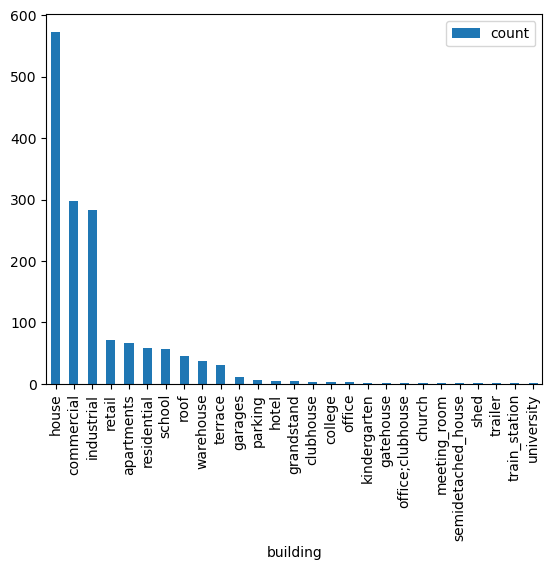

In [26]:
#Visualizing the data through a bar chart
osm_build_count.plot.bar(x='building');

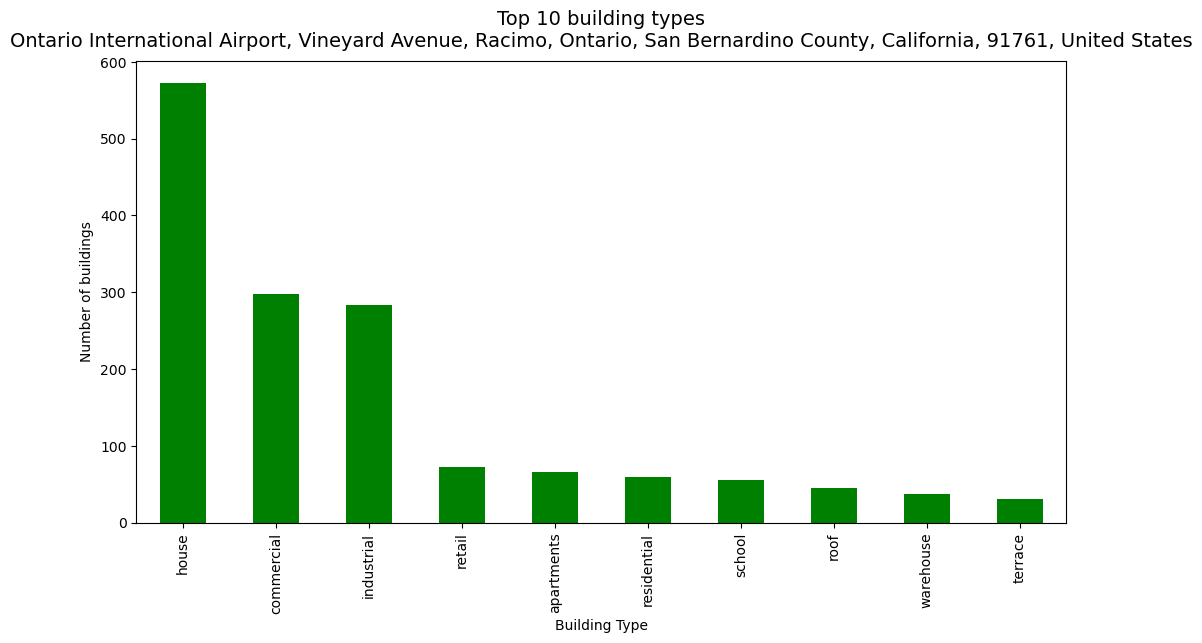

In [27]:
#creating another, more readable chart
fig, ax = plt.subplots(figsize=(12,6))

osm_build_count[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='green'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



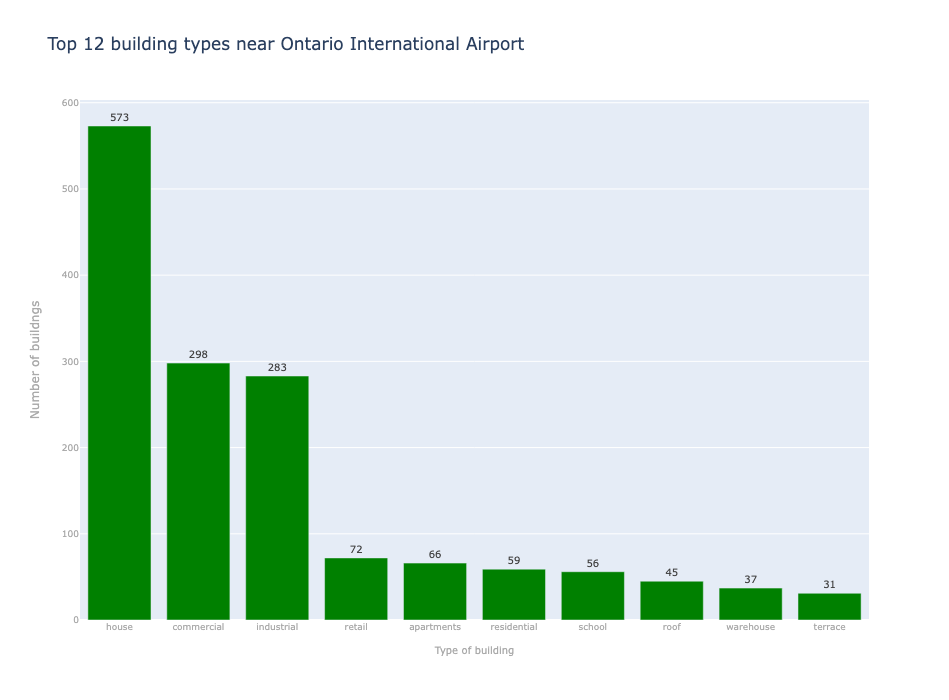

In [28]:
# creating a plotly graph
fig = px.bar(osm_build_count.head(10),
        x='building',
        y='count',
        title="Top 12 building types near Ontario International Airport", 
        text_auto = True,
        height=700,
        width=900,
        color_discrete_sequence =['green']*len(osm_build_count),
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# labeling the bar
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# labeling the axes
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

<AxesSubplot: >

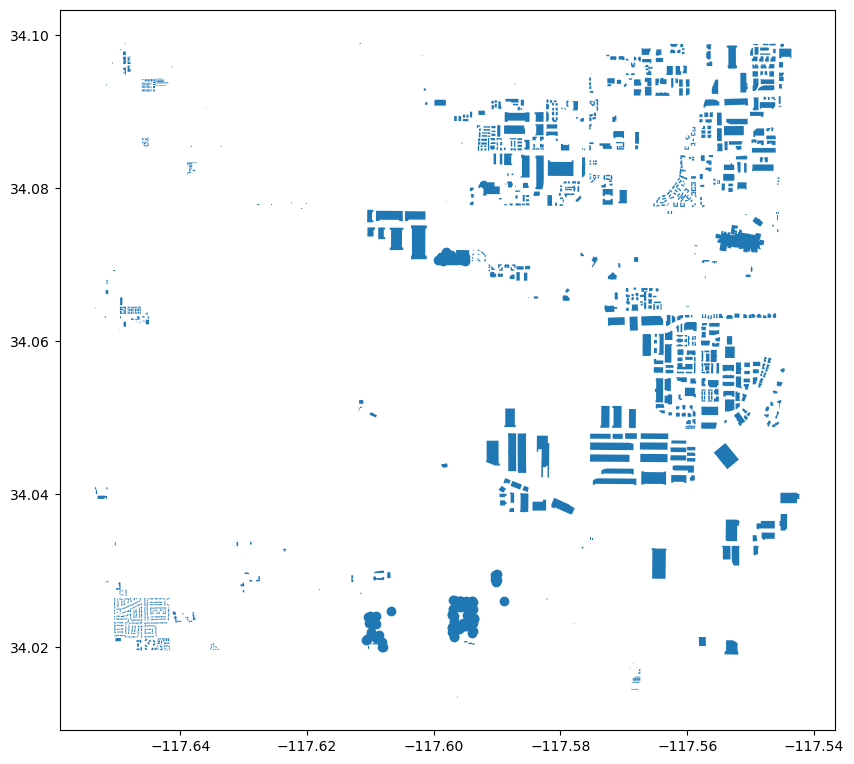

In [29]:
osm.plot(figsize=(10,10))

In [30]:
#removing unwanted building types using .loc
osm.drop(osm.loc[osm['building']=='trailer'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='church'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='clubhouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='garages'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='office;clubhouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='office'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='parking'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='college'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='gatehouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='hotel'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='roof'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='terrace'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='shed'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='meeting_room'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='grandstand'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='semidetached_house'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='train_station'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='kindergarten'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='commercial'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='apartments'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='retail'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='school'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='university'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='residential'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='house'].index,inplace=True)

<AxesSubplot: >

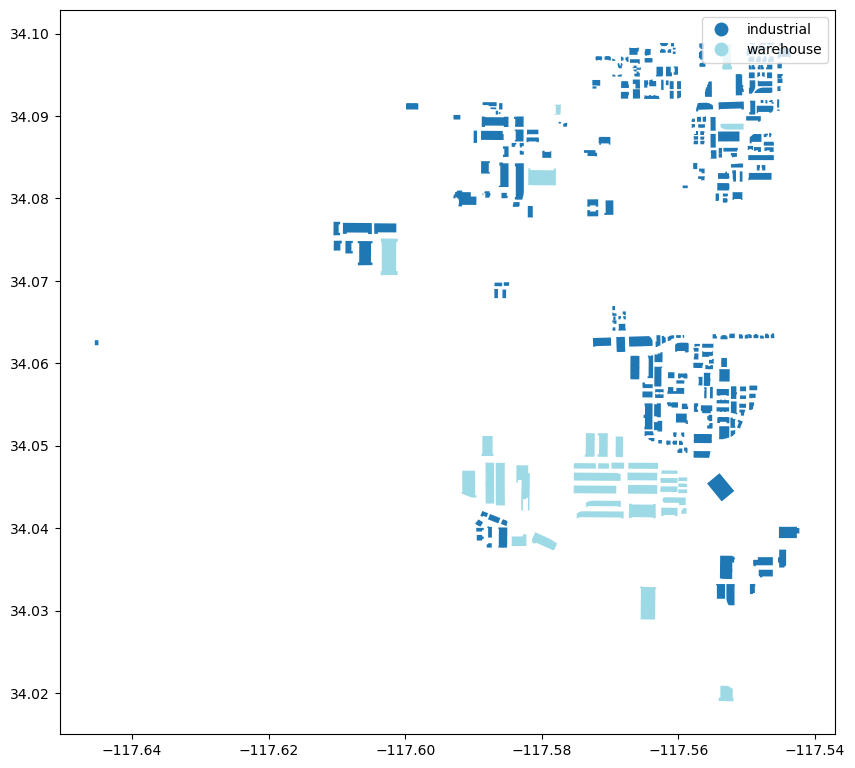

In [31]:
#trying to color code the buildings
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [32]:
#using Web Mercator
osm_wm=osm.to_crs(epsg=3857)

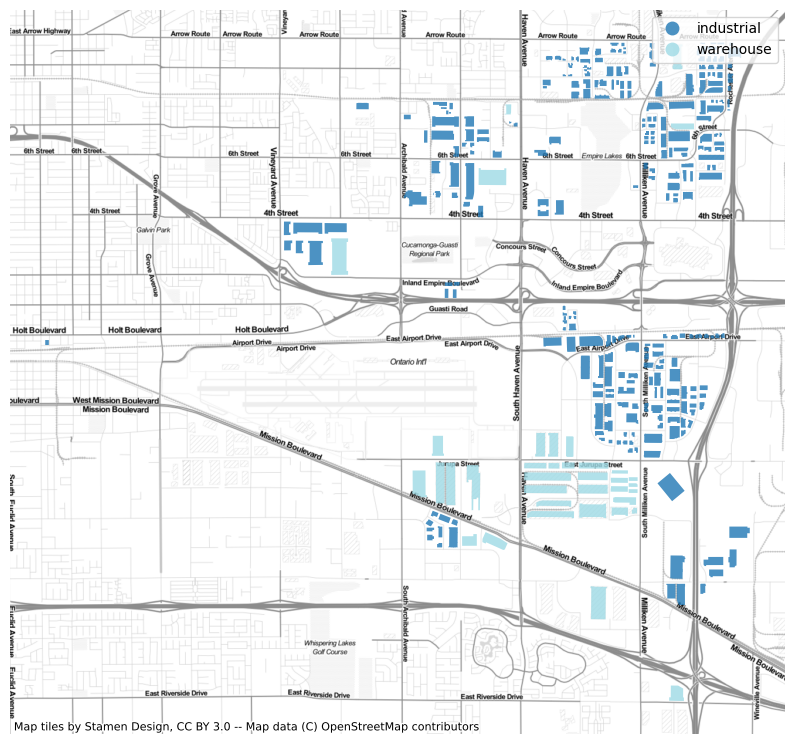

In [33]:
#adding a basemap
fig,ax=plt.subplots(figsize=(10,10))
osm_wm.plot(ax=ax,
            column='building',
            cmap='tab20',
            legend=True,
            alpha=0.8,
           )

ax.axis('off');

ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=1
               )

In [34]:
##trying to create a morphology map - first by determining map bounds
#obtain the minimum and maximum for longitude and latitude
minx=osm.total_bounds[0]
miny=osm.total_bounds[1]
maxx=osm.total_bounds[2]
maxy=osm.total_bounds[3]

In [35]:
#putting all the building types in a list
buildingtypes=osm['building'].unique().tolist()
buildingtypes

['warehouse', 'industrial']

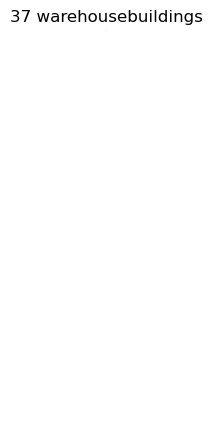

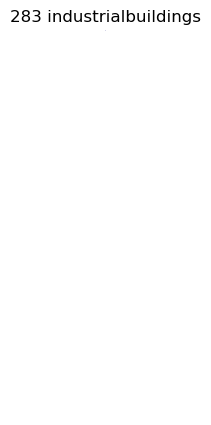

In [36]:
#attempting to loop through each building type
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(5,5))
    
    #creating the map plot
    osm.plot(ax=ax, 
             color='green')
    
    osm[osm['building']==type].plot(ax=ax,
            color='blue')
    
    #setting map extent
    ax.set_xlim((minx,maxx))
    ax.set_ylim((minx,maxy))
    
    #adding title
    number_of_build=len(osm[osm['building']==type])
    ax.set_title(str(number_of_build)+' '+type+'buildings')
    #removing axis
    ax.axis('off');